# Structurer un workflow pour le déployer en production

<img src="../images/workflow.png" alt="image workflow">

In [243]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [244]:
data = sns.load_dataset('tips')

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [246]:
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [247]:
y = data['tip']

In [248]:
X = data.drop(columns=['tip'])

In [249]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [250]:
from sklearn.linear_model import LinearRegression

In [251]:
lg = LinearRegression()

# Iteration 1 - categoric features (get_dummies)

In [252]:
X_train

,total_bill,sex,smoker,day,time,size
168,10.59,Female,Yes,Sat,Dinner,2
137,14.15,Female,No,Thur,Lunch,2
152,17.26,Male,No,Sun,Dinner,3
111,7.25,Female,No,Sat,Dinner,1
100,11.35,Female,Yes,Fri,Dinner,2
...,...,...,...,...,...,...
192,28.44,Male,Yes,Thur,Lunch,2
178,9.60,Female,Yes,Sun,Dinner,2
185,20.69,Male,No,Sun,Dinner,5
234,15.53,Male,Yes,Sat,Dinner,2


In [253]:
y_train

168    1.61
137    2.00
152    2.74
111    1.00
100    2.50
       ... 
192    2.56
178    4.00
185    5.00
234    3.00
74     2.20
Name: tip, Length: 170, dtype: float64

In [254]:
#lg.fit(X_train, y_train)

In [255]:
X_train.sample(2)

,total_bill,sex,smoker,day,time,size
2,21.01,Male,No,Sun,Dinner,3
231,15.69,Male,Yes,Sat,Dinner,3


In [256]:
X_train_dummies = pd.get_dummies(X_train)

In [257]:
X_train_dummies.sample(2)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
159,16.49,4,1,0,0,1,0,0,0,1,0,1
201,12.74,2,0,1,1,0,1,0,0,0,1,0


In [258]:
lg_train = lg.fit(X_train_dummies, y_train)

In [259]:
X_test_dummies = pd.get_dummies(X_test)

In [260]:
lg_train.score(X_test_dummies, y_test)

0.42581605349666496

# Iteration 2 - categoric + numeric features

In [261]:
X_train_2,X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3)

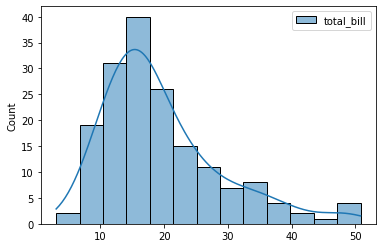

In [262]:
sns.histplot(data=X_train_2[["total_bill"]], kde=True);

<AxesSubplot:ylabel='Count'>

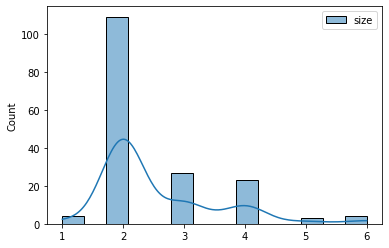

In [263]:
sns.histplot(data=X_train_2[["size"]], kde=True)

## Scaler

### Numerical features

In [264]:
from sklearn.preprocessing import MinMaxScaler

In [265]:
scaler = MinMaxScaler()
scaler.fit(X_train_2[["size","total_bill"]])
X_train_2_scaled = scaler.transform(X_train_2[["size","total_bill"]])

In [266]:
X_train_2_scaled_df = pd.DataFrame(X_train_2_scaled).rename(columns={0: "size_scaled", 1: "total_bill_scaled"})

In [267]:
X_train_2_scaled_df

,size_scaled,total_bill_scaled
0,0.4,0.280687
1,0.6,0.465438
2,0.4,0.315878
3,0.2,0.276498
4,0.2,0.094051
...,...,...
165,0.2,0.056137
166,0.4,0.290323
167,0.2,0.301424
168,0.2,0.200880


### Categorical Features

In [268]:
X_train_2[["sex","smoker","day","time"]].nunique()

sex       2
smoker    2
day       4
time      2
dtype: int64

In [269]:
from sklearn.preprocessing import OneHotEncoder

In [270]:
ohe = OneHotEncoder()

In [271]:
ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

<170x10 sparse matrix of type '<class 'numpy.float64'>'
	with 680 stored elements in Compressed Sparse Row format>

In [272]:
X_train_2_ohe = ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

In [273]:

X_train_2_ohe_df = pd.DataFrame.sparse.from_spmatrix(X_train_2_ohe)

In [274]:
X_train_2_ohe_df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [275]:
X_train_2_prep_df = pd.concat([X_train_2_ohe_df, X_train_2_scaled_df], axis=1)

In [276]:
X_train_2_prep_df

,0,1,2,3,4,5,6,7,8,9,size_scaled,total_bill_scaled
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.4,0.280687
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.6,0.465438
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4,0.315878
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.2,0.276498
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.2,0.094051
...,...,...,...,...,...,...,...,...,...,...,...,...
165,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.2,0.056137
166,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.4,0.290323
167,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2,0.301424
168,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2,0.200880


In [277]:
lg_2 = LinearRegression()

In [278]:
lg_2.fit(X_train_2_prep_df,y_train_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [279]:
#===> Il faut scalé le X_test_2_prep_df. Avec la même methodologie que le X_train_2, sans faire de dataLeakeage. 
# ==> Creéer les methodes appropriées pour réutiliser la logique.


In [289]:
def to_scale(df,columns_list,standard=False) :
    
    if standard : scaler = StandardScaler()
    else : scaler = MinMaxScaler()
    
    scaler.fit(X_train_2[columns_list])
    df_scaled = scaler.transform(df[columns_list])

    return pd.DataFrame(df_scaled).rename(columns={i:f"{columns_list[i]}_scaled" for i in range(len(columns_list))})



In [290]:
def to_ohe(df,columns_list) :
    
    ohe = OneHotEncoder()
    ohe.fit(X_train_2[columns_list])
    df_ohe = ohe.transform(df[columns_list])

    return pd.DataFrame.sparse.from_spmatrix(df_ohe)

X_test_2_scaled = to_scale(X_test_2,['size','total_bill'])

X_test_2_ohe = to_ohe(X_test_2,["sex","smoker","day","time"])

X_test_2_prep_df= pd.concat([X_test_2_ohe, X_test_2_scaled], axis=1)


In [291]:
lg_2.score(X_test_2_prep_df, y_test_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.17296917409394597

In [292]:
# Afficher un nuage de point qui révéle les informations suivantes : y_true vs y_predict en fonction de total_bill

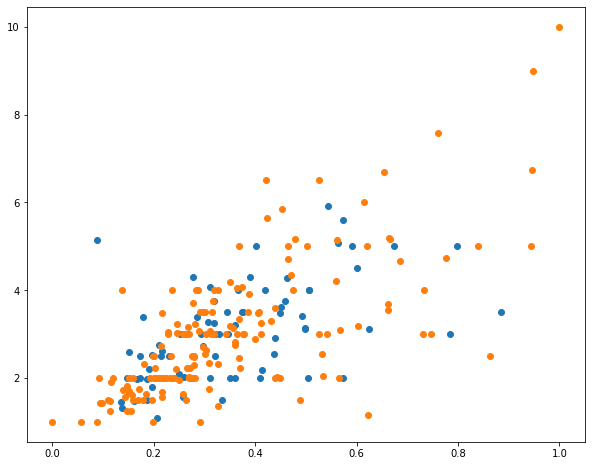

In [302]:
plt.figure(figsize=(10,8))
plt.scatter(X_test_2_prep_df['total_bill_scaled'],y_test_2)
plt.scatter(X_train_2_prep_df['total_bill_scaled'],y_train_2)
plt.show()

In [294]:
# Re-testester avec un StandardScaler => https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

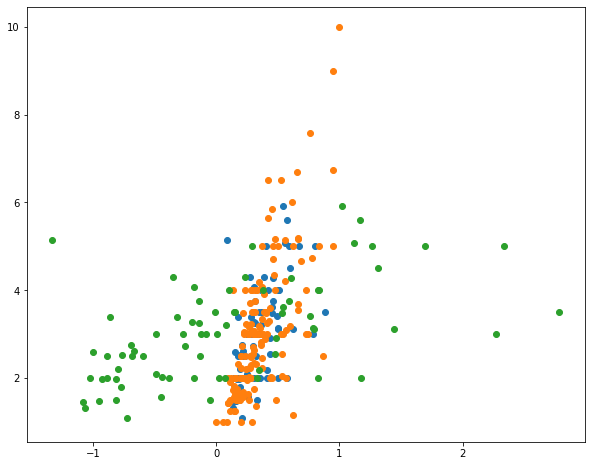

In [301]:
X_test_2_scaled_std = to_scale(X_test_2,['size','total_bill'],True)

X_test_2_ohe_std = to_ohe(X_test_2,["sex","smoker","day","time"])

X_test_2_prep_df_std = pd.concat([X_test_2_ohe, X_test_2_scaled], axis=1)

plt.figure(figsize=(10,8))
plt.scatter(X_test_2_prep_df['total_bill_scaled'],y_test_2)
plt.scatter(X_train_2_prep_df['total_bill_scaled'],y_train_2)
plt.scatter(X_test_2_prep_df_std['total_bill_scaled'],y_test_2)
plt.show()

In [295]:
# Afficher l'hétéroscédasticité ou l'homoscédasticité des erreurs.

In [296]:
# Afficher la distribution des erreurs. (Normalité des erreus).

In [297]:
# Créer un package à l'aide https://pypi.org/project/setuptools/